**Kernel PCA examples**

**Making half moon samples**

[0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1]


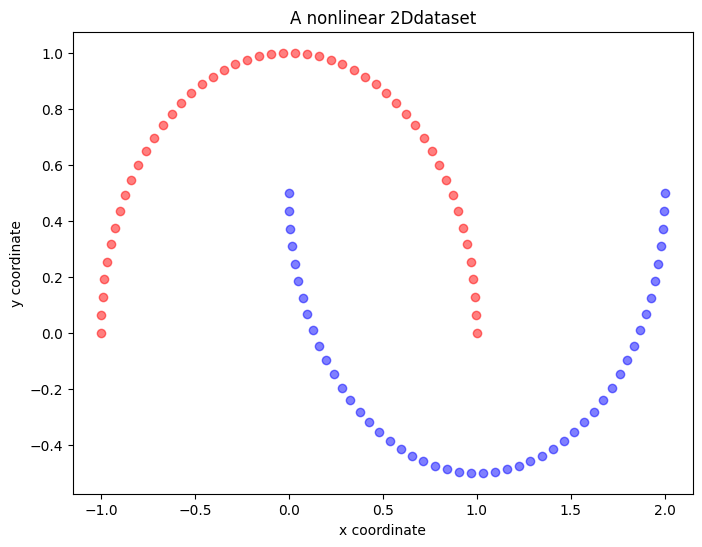

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA


from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123) # Make two interleaving half circles.
# print(X)
print(y)
# X_1 = X[y==0]
# X_2 = X[y==0]
# print(X_1)
# print(X_2)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

# plt.scatter(X_1[:, 0], X_1[:,1], color='red', alpha=0.5)
# plt.scatter(X_2[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

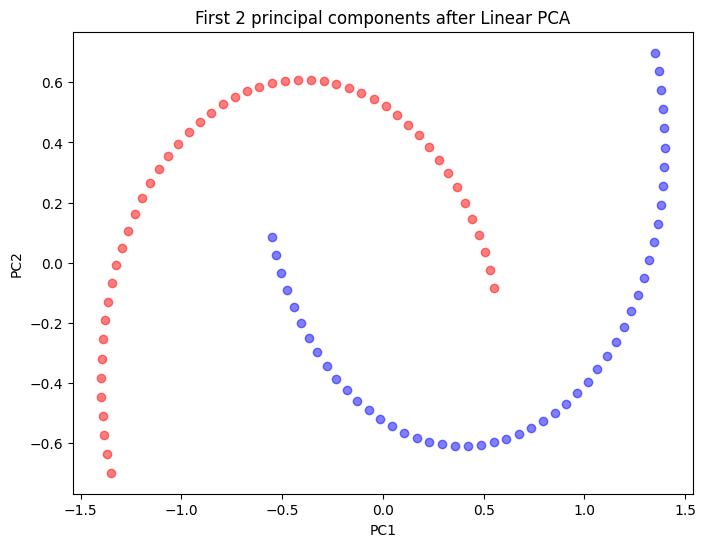

In [2]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

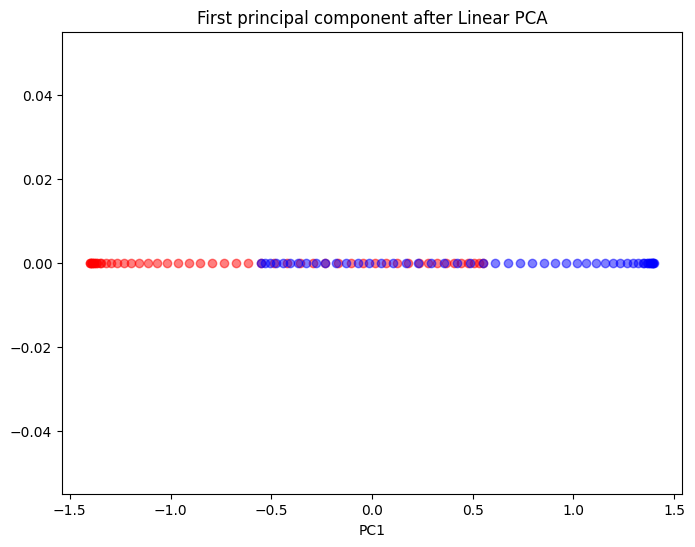

In [3]:
import numpy as np
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

**As we can see, the resulting principal components do not yield a subspace where the data is linearly separated well**

**Let's use kernel PCA on this dataset**

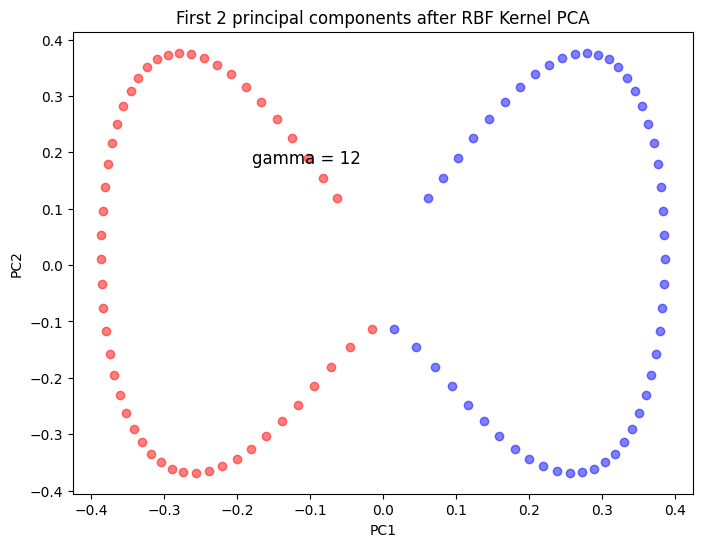

In [4]:
# X_pc = stepwise_kpca(X, gamma=15, n_components=2)
gamma_value = 12
kpca_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=gamma_value)
X_kpca_rbf = kpca_rbf.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca_rbf[y==0, 0], X_kpca_rbf[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca_rbf[y==1, 0], X_kpca_rbf[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, f'gamma = {gamma_value}', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**How about the first principal component**


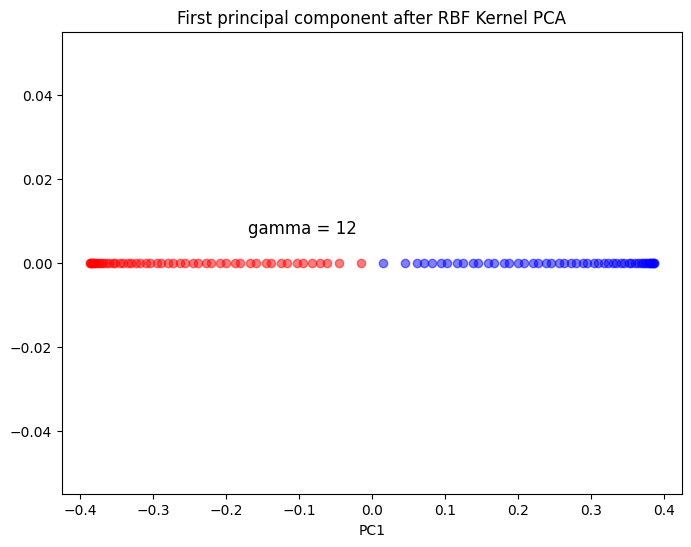

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca_rbf[y==0, 0], np.zeros((50)), color='red', alpha=0.5) # alpha is the blending value
plt.scatter(X_kpca_rbf[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.17, 0.007, f'gamma = {gamma_value}', fontsize=12)
plt.xlabel('PC1')
plt.show()

**Let's use a polynomial kernel**

In [24]:
poly_degree = 8
kpca_poly = KernelPCA(n_components=2, kernel="poly", degree=poly_degree)  # Polynomial of degree 2
X_kpca_poly = kpca_poly.fit_transform(X)

**Let's try to view the scatter plot first principal components**

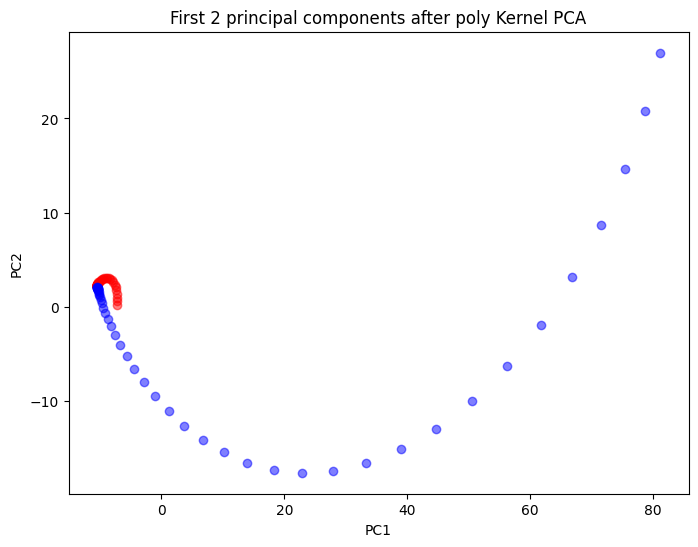

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca_poly[y==0, 0], X_kpca_poly[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca_poly[y==1, 0], X_kpca_poly[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after poly Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

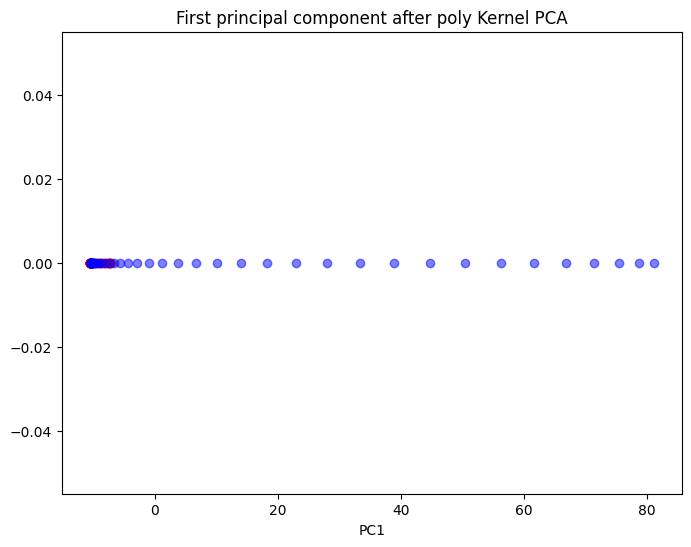

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca_poly[y==0, 0], np.zeros((50)), color='red', alpha=0.5) # alpha is the blending value
plt.scatter(X_kpca_poly[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after poly Kernel PCA')
plt.xlabel('PC1')
plt.show()

**Let's make some circles**

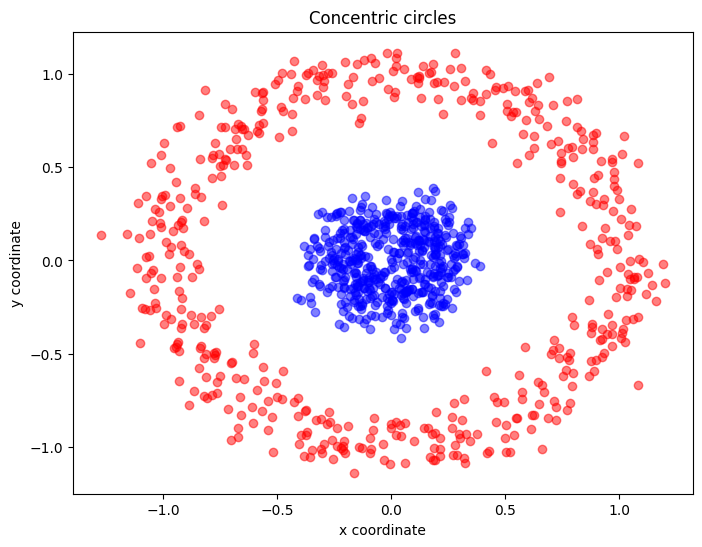

In [27]:
from sklearn.datasets import make_circles
 
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)  # Make a large circle containing a smaller circle in 2d.
# print(y) # y is a mask to denote which circle point belongs to
plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

**Let's do linear PCA and see what happens**

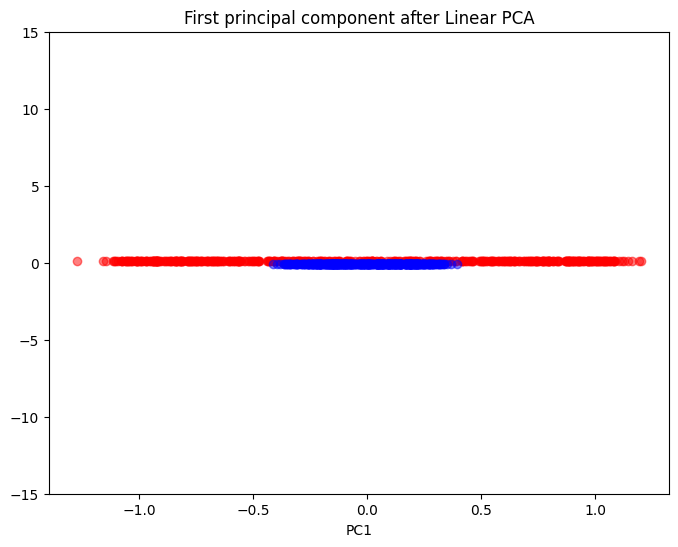

In [28]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)  # addeed a slight increment to see the points clearly
plt.scatter(X[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5) # addeed a slight decrement to see the points clearly
plt.ylim([-15,15])
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

**Let's try this on a gaussian kernel**

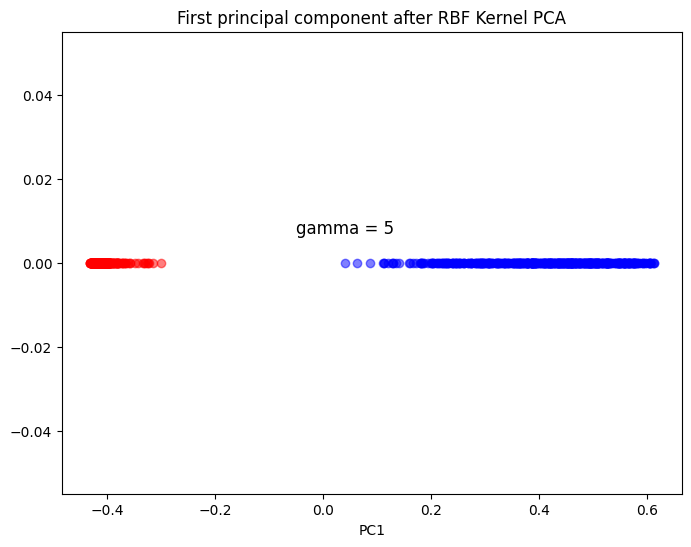

In [29]:
gamma_value = 5
kpca_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=gamma_value)
X_kpca_rbf = kpca_rbf.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca_rbf[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_kpca_rbf[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(-0.05, 0.007, f'gamma = {gamma_value}', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

**Let's look at another type of synthetic dataset**

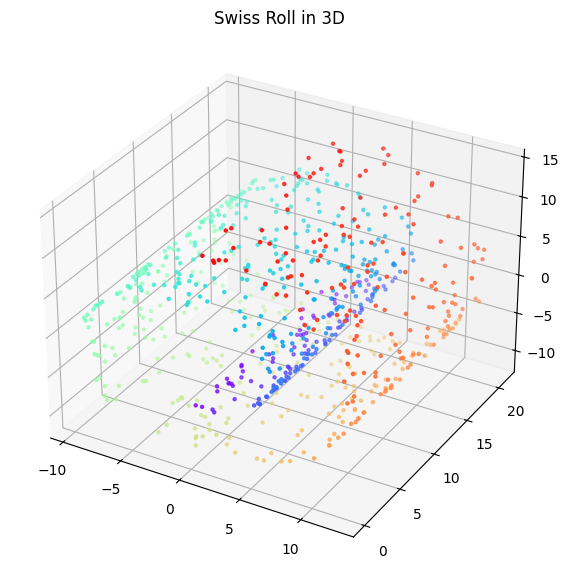

In [5]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html
X, color = make_swiss_roll(n_samples=800, random_state=123) # Generate a swiss roll dataset.
# This is a 1D array of values that can be used to color the points when plotting the Swiss roll. These values typically correspond to the 
# "unrolled" position of each point along one of the intrinsic dimensions of the manifold (often the 𝑡
#t parameter, which represents the angle or position along the roll)
# print(color)
# print(X)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow, s=5, marker='o')
plt.title('Swiss Roll in 3D')
plt.show()

Let's do linear PCA 

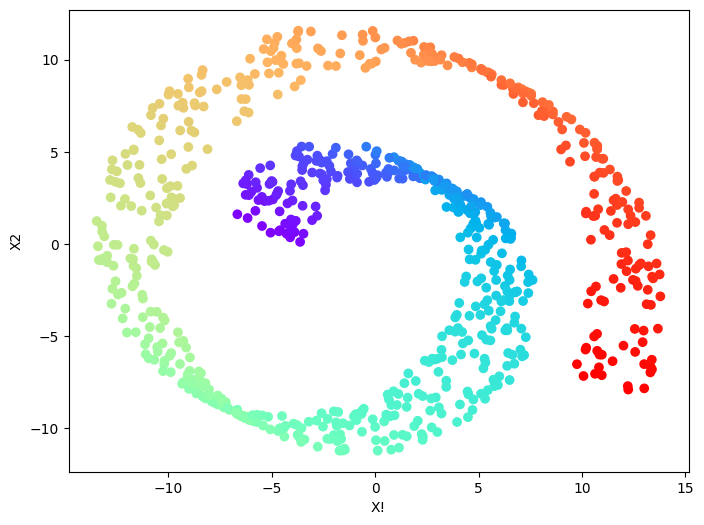

In [6]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)
# plt.title('First 2 principal components after Linear PCA')
plt.xlabel('X!')
plt.ylabel('X2')
plt.show()

**Let's do PCA and project one component**

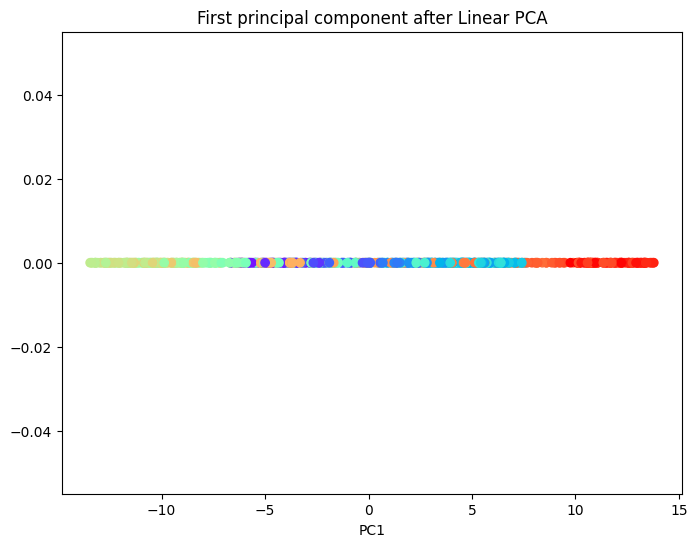

In [7]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca, np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

**Let's do this on gaussian kernel**

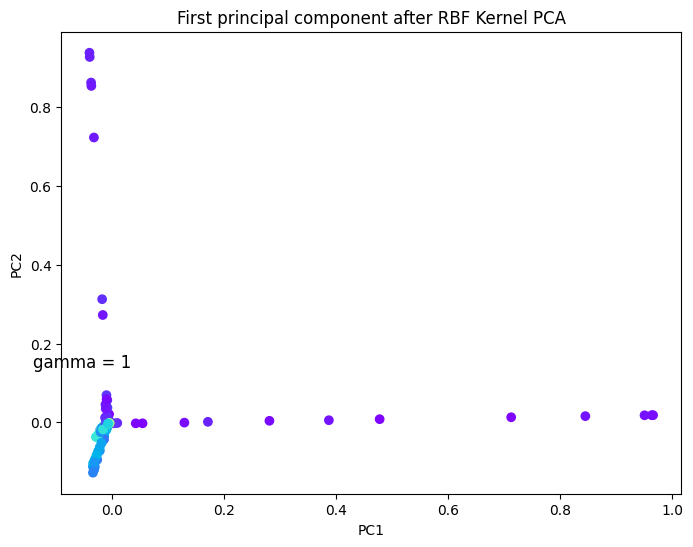

In [8]:
gamma_value = 1
kpca_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=gamma_value)
X_kpca_rbf = kpca_rbf.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=color, cmap=plt.cm.rainbow)
plt.text(-0.14, 0.14, f'gamma = {gamma_value}', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Does not look like it works well with this dataset**

**Local linear Embedding**

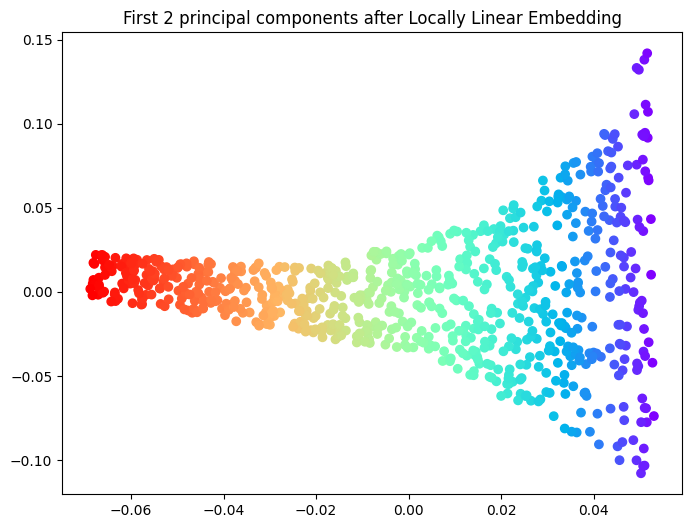

In [9]:
from sklearn.manifold import locally_linear_embedding

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)  # returns Embedding vectors. squared_error

plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

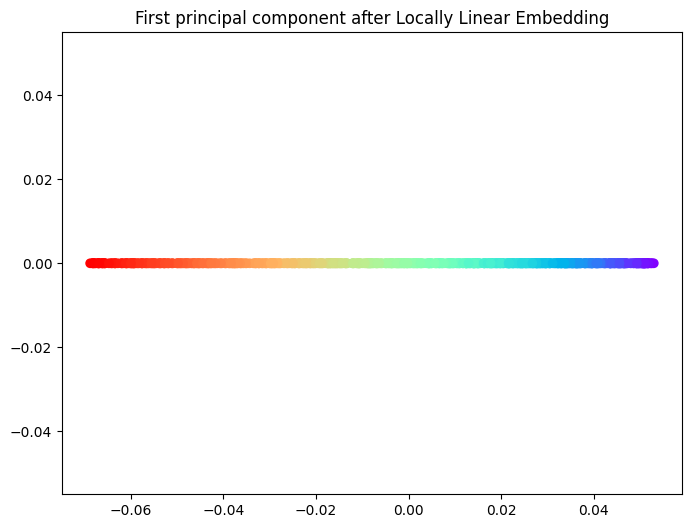

In [36]:
from sklearn.manifold import locally_linear_embedding

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=1)

plt.figure(figsize=(8,6))
plt.scatter(X_lle, np.zeros((800,1)), c=color, cmap=plt.cm.rainbow)

plt.title('First principal component after Locally Linear Embedding')
plt.show()